In [34]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [37]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [40]:
df.drop(106,axis=0,inplace=True)

In [41]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [15]:
df.drop(106,axis=0,inplace=True)

In [42]:
df.columns=['Month','Sales per month' ]

In [43]:
df.head()

,Month,Sales per month
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [44]:
df['Month']=pd.to_datetime(df['Month'])

In [46]:
df.head()

,Month,Sales per month
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [47]:
df.set_index('Month',inplace=True)

In [48]:
df.head()

,Sales per month
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


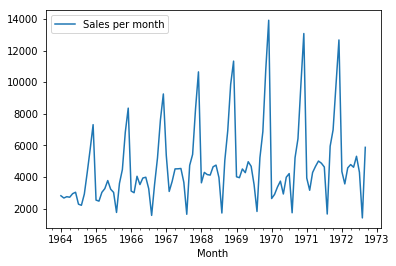

In [22]:
df.plot()

In [49]:
model=sm.tsa.statespace.SARIMAX(df['Sales per month'],order=(1, 0, 0),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\H272217\AppData\Loca\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


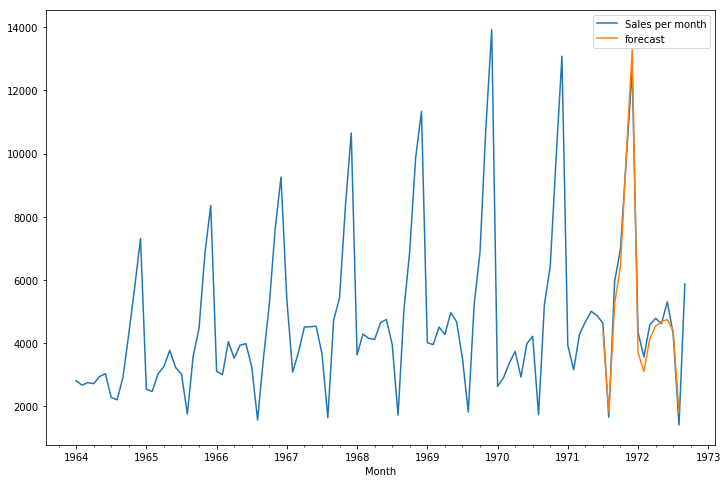

In [24]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales per month','forecast']].plot(figsize=(12,8))

In [25]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [26]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [50]:
future_datest_df

,Sales per month,forecast
1972-10-01,NaN,6891.031647
1972-11-01,NaN,9792.430347
1972-12-01,NaN,12626.245470
1973-01-01,NaN,4399.506070
1973-02-01,NaN,3545.267002
1973-03-01,NaN,4609.191004
1973-04-01,NaN,4832.584420
1973-05-01,NaN,4797.530083
1973-06-01,NaN,5317.071930
1973-07-01,NaN,4335.921176


In [32]:
future_df=pd.concat([df,future_datest_df])

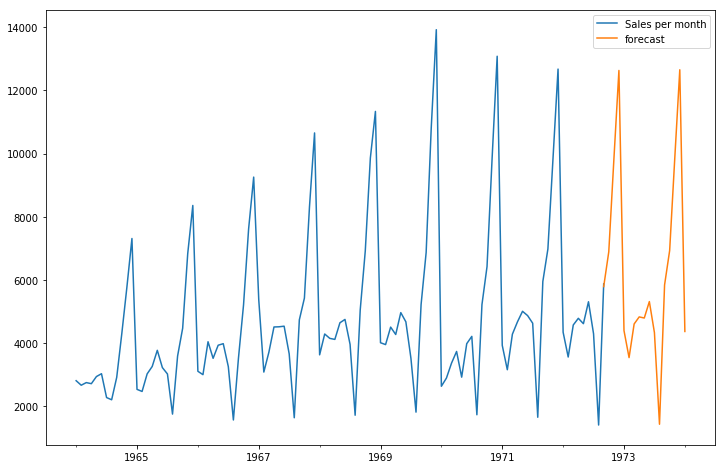

In [33]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales per month', 'forecast']].plot(figsize=(12, 8)) 